In [2]:
import pandas as pd

data = pd.read_csv('/home/ejenliya/Projects/FotoCaptions/data/data.csv')
data.head()

,text,likes,time
0,Органайзер на шею PORTA MAPPA SHELL MAP - это ...,1 отметка «Нравится»,20 МИНУТ НАЗАД
1,ХИБИНЫ в АКТИВЕ)🎿❄️⛷️\n#насевережить\n#активны...,"15 отметок ""Нравится""",30 МИНУТ НАЗАД
2,Даты туров на март 📅\n\n3-х дневный тур\n5-7 ...,"6 отметок ""Нравится""",33 МИНУТ НАЗАД
3,Там было таинственно тихо.\n\nНи звука.\n\nНик...,"233 отметок ""Нравится""",20 ЧАСОВ НАЗАД
4,"Ради этого ехать точно не стоит!\nНо, если вы ...","45 отметок ""Нравится""",ЧАС НАЗАД


In [2]:
data.shape

(9409, 3)

In [3]:
data = data[data['likes'] != 'другим']
data.shape

(9048, 3)

In [4]:
data.isnull().sum()

text     2123
likes    1740
time      836
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()

text     0
likes    0
time     0
dtype: int64

In [5]:
def filter_num(str):
    new_str = ''
    ascii_numbers = range(48, 58)
    for symbol in str:
        if ord(symbol) in ascii_numbers:
            new_str += symbol 

    try:
        num = int(new_str)
    except Exception as ex:
        num = 1

    return num

In [6]:
data['likes'] = data['likes'].apply(filter_num)
data.head()

,text,likes,time
0,Органайзер на шею PORTA MAPPA SHELL MAP - это ...,1,20 МИНУТ НАЗАД
1,ХИБИНЫ в АКТИВЕ)🎿❄️⛷️\n#насевережить\n#активны...,15,30 МИНУТ НАЗАД
2,Даты туров на март 📅\n\n3-х дневный тур\n5-7 ...,6,33 МИНУТ НАЗАД
3,Там было таинственно тихо.\n\nНи звука.\n\nНик...,233,20 ЧАСОВ НАЗАД
4,"Ради этого ехать точно не стоит!\nНо, если вы ...",45,ЧАС НАЗАД


In [7]:
from datetime import datetime

month_rus = {
    'январь': 1,
    'февраль': 2,
    'март': 3,
    'апрель': 4,
    'май': 5,
    'июнь': 6,
    'июль': 7,
    'август': 8,
    'сентябрь': 9,
    'октябрь': 10,
    'ноябрь': 11,
    'декабрь': 12
}

def date_diff(str):
    str = str.lower()
    if 'мин' in str:
        return filter_num(str)
    elif 'час' in str:
        return filter_num(str)*60
    elif 'дней' in str or 'день' in str:
        return filter_num(str)*1440
    else:
        res = str.split(' ')
        res.reverse()
        try:
            res[1], res[2] = month_rus[res[2]], res[1][0:-1]
        except Exception as ex:
            res = ['2023', month_rus[res[1]], res[0]]

        today = datetime.today()
        day = datetime(int(res[0]), int(res[1]), int(res[2]))
        return int((today - day).total_seconds()/60)


In [8]:
data['time'] = data['time'].apply(date_diff)
data.head()

,text,likes,time
0,Органайзер на шею PORTA MAPPA SHELL MAP - это ...,1,20
1,ХИБИНЫ в АКТИВЕ)🎿❄️⛷️\n#насевережить\n#активны...,15,30
2,Даты туров на март 📅\n\n3-х дневный тур\n5-7 ...,6,33
3,Там было таинственно тихо.\n\nНи звука.\n\nНик...,233,1200
4,"Ради этого ехать точно не стоит!\nНо, если вы ...",45,60


In [9]:
data = data.reset_index().drop(columns=['index'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6183 entries, 0 to 6182
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6183 non-null   object
 1   likes   6183 non-null   int64 
 2   time    6183 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 145.0+ KB


In [10]:
def filter_text(str):
    str = str.lower()
    new_str = ''
    ascii_numbers = list(range(1072, 1106))
    ascii_numbers.append(32)

    for symbol in str:
        if ord(symbol) in ascii_numbers:
            new_str += symbol 
        else:
            new_str += ' '

    return new_str

In [11]:
data['text'] = data['text'].apply(filter_text)
data.head()

,text,likes,time
0,органайзер на шею это ...,1,20
1,хибины в активе насевережить активныйо...,15,30
2,даты туров на март х дневныи тур мар...,6,33
3,там было таинственно тихо ни звука никого ...,233,1200
4,ради этого ехать точно не стоит но если вы с...,45,60


In [16]:
import pymorphy2


morth = pymorphy2.MorphAnalyzer()
functors_pos = {'INTJ', 'PRCL', 'CONJ', 'PREP'}

def drop_superfuluos(text):
    text = text.split()
    new_text = ''

    for word in text:
        if morth.parse(word)[0].tag.POS not in functors_pos:
            new_text += morth.parse(word)[0].normal_form
            new_text += ' '

    return new_text

In [17]:
data['text'] = data['text'].apply(drop_superfuluos)
data.head()

,text,likes,time,likes_per_day,popularity
0,органайзер шея специальный держатель карта док...,1,20,72,0
1,хибины актив насеверёжить активныйотдых хибины...,15,30,720,1
2,дата тур март х дневный тур март март март цен...,6,33,261,1
3,там быть таинственно тихо звук никто зима снег...,233,1200,279,1
4,это ехать точно стоить вы собраться монастырь ...,45,60,1080,1


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
'''import nltk
nltk.download("stopwords")'''

from nltk.corpus import stopwords

stopwords = stopwords.words("russian")

tf_idf_vec = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words=stopwords)
 
 
tf_idf_data = tf_idf_vec.fit_transform(data['text'])
 
tf_idf_frame = pd.DataFrame(tf_idf_data.toarray(), columns=tf_idf_vec.get_feature_names_out())
tf_idf_frame.head()

,ааябай,абад,абажать,абай,абайатында,абайк,абайскийрайон,абакан,абаканский,абаятройка,...,ёбург,ёж,ёжик,ёлка,ёлочка,ёлочнаяигрушка,ёмкий,ёмкость,ёрш,ёссссс
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def split_text(text):
    return text.split()

data['text'] = data['text'].apply(split_text)
data.head()

,text,likes,time,likes_per_day,popularity
0,"[органайзер, шея, специальный, держатель, карт...",1,20,72,0
1,"[хибины, актив, насеверёжить, активныйотдых, х...",15,30,720,1
2,"[дата, тур, март, х, дневный, тур, март, март,...",6,33,261,1
3,"[там, быть, таинственно, тихо, звук, никто, зи...",233,1200,279,1
4,"[это, ехать, точно, стоить, вы, собраться, мон...",45,60,1080,1


In [20]:
from gensim.models import Word2Vec

w2v = Word2Vec(min_count=20, window=4, negative=10, vector_size=300, alpha=0.03, min_alpha=0.0007, sample=6e-5, sg=1)
w2v.build_vocab(data['text'])

w2v.train(data['text'], total_examples=w2v.corpus_count, epochs=30, report_delay=1)


(1851348, 7235190)

In [21]:
keys = []
for col in tf_idf_frame.columns:
    try:
        w2v.wv[col]
        keys.append(col)
    except Exception as ex:
        print(ex)
        continue

"Key 'ааябай' not present"
"Key 'абад' not present"
"Key 'абажать' not present"
"Key 'абай' not present"
"Key 'абайатында' not present"
"Key 'абайк' not present"
"Key 'абайскийрайон' not present"
"Key 'абакан' not present"
"Key 'абаканский' not present"
"Key 'абаятройка' not present"
"Key 'абгарян' not present"
"Key 'абдать' not present"
"Key 'абельдинов' not present"
"Key 'аби' not present"
"Key 'абил' not present"
"Key 'абиотический' not present"
"Key 'абитов' not present"
"Key 'абитуриент' not present"
"Key 'абитуриентка' not present"
"Key 'абишир' not present"
"Key 'абонемент' not present"
"Key 'абонент' not present"
"Key 'абордаж' not present"
"Key 'абориген' not present"
"Key 'абразивный' not present"
"Key 'абраменко' not present"
"Key 'абрамец' not present"
"Key 'абрикоскаакасть' not present"
"Key 'абрикосовый' not present"
"Key 'абс' not present"
"Key 'абсолютный' not present"
"Key 'абстрактнаяживопиться' not present"
"Key 'абстрактный' not present"
"Key 'абстракция' not presen

In [35]:
'''indxs = [str(i) for i in range(0, 300)]
words_embs = pd.DataFrame(columns=[['word'] + indxs])
words_embs.head()'''

,word,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299


In [24]:
'''for i, col in enumerate(tf_idf_frame.columns):
    try:
        emb = w2v.wv[col].tolist()
        words_embs.loc[i] = [col] + emb
    except Exception as ex:
        print(ex)
        continue'''

'for i, col in enumerate(tf_idf_frame.columns):\n    try:\n        emb = w2v.wv[col].tolist()\n        words_embs.loc[i] = [col] + emb\n    except Exception as ex:\n        print(ex)\n        continue'

In [25]:
'''words_embs = words_embs.reset_index().drop(columns=['index'])
words_embs.info()'''

"words_embs = words_embs.reset_index().drop(columns=['index'])\nwords_embs.info()"

In [26]:
'''words_embs_to_cluster = words_embs.set_index('word')
words_embs_to_cluster.head()'''

"words_embs_to_cluster = words_embs.set_index('word')\nwords_embs_to_cluster.head()"

In [28]:
'''from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, init='k-means++', random_state=10)
kmeans.fit(words_embs_to_cluster)

kmeans.labels_'''

"from sklearn.cluster import KMeans\n\nkmeans = KMeans(n_clusters=20, init='k-means++', random_state=10)\nkmeans.fit(words_embs_to_cluster)\n\nkmeans.labels_"

In [29]:
'''labels = kmeans.labels_
len(labels)'''

'labels = kmeans.labels_\nlen(labels)'

In [30]:
'''import numpy as np

indxs = [str(i) for i in range(0, 20)]
cluster_tf_idf = pd.DataFrame(np.random.randint(0, 1, size=(2972, 20)), columns=indxs).astype(float)

#cluster_tf_idf.sum().sum()
cluster_tf_idf.head()'''

'import numpy as np\n\nindxs = [str(i) for i in range(0, 20)]\ncluster_tf_idf = pd.DataFrame(np.random.randint(0, 1, size=(2972, 20)), columns=indxs).astype(float)\n\n#cluster_tf_idf.sum().sum()\ncluster_tf_idf.head()'

In [22]:
tf_idf_frame = tf_idf_frame[keys]
tf_idf_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683 entries, 0 to 5682
Columns: 1871 entries, або to ёлка
dtypes: float64(1871)
memory usage: 81.1 MB


In [94]:
infl = tf_idf_frame.sum().sort_values(ascending=False)
max_infl = [infl.index[i] for i in range(len(infl)) if infl[i] > 6]
len(max_infl)

632

In [56]:
tf_idf_frame = tf_idf_frame[max_infl]
tf_idf_frame.info()

/tmp/ipykernel_11005/2411263361.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  tf_idf_frame = tf_idf_frame[set(keys).intersection(set(max_infl))]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Columns: 251 entries, работать to знать
dtypes: float64(251)
memory usage: 5.7 MB


In [95]:
tf_idf_frame.head()

,або,абсолютно,абхазия,авто,автобус,автомат,автомоб,автомобиль,автор,авторский,...,юморист,являться,язык,яйцо,як,який,январь,яркий,яхта,ёлка
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
'''for i in range(tf_idf_frame.shape[0]):
    print(f'row: {i}')
    for col in tf_idf_frame.loc[i][tf_idf_frame.loc[i] != 0.0].index:
        try:
            idx_of_word = words_embs[words_embs['word'] == col]['word'].dropna().index
            cluster_of_word = labels[idx_of_word]
            print(f'label {str(cluster_of_word[0])}')
        except Exception as ex:
            print('failed at clustering')
        
        try:
#            if tf_idf_frame.loc[i][col] != 0:
            cluster_tf_idf.loc[i][str(cluster_of_word[0])] += tf_idf_frame.loc[i][col]
            print(f'row: {i}, word: {col}, clts_chng: {cluster_tf_idf.loc[i][str(cluster_of_word[0])]}')
        except Exception as ex:
            print('failed at adding')'''


"for i in range(tf_idf_frame.shape[0]):\n    print(f'row: {i}')\n    for col in tf_idf_frame.loc[i][tf_idf_frame.loc[i] != 0.0].index:\n        try:\n            idx_of_word = words_embs[words_embs['word'] == col]['word'].dropna().index\n            cluster_of_word = labels[idx_of_word]\n            print(f'label {str(cluster_of_word[0])}')\n        except Exception as ex:\n            print('failed at clustering')\n        \n        try:\n#            if tf_idf_frame.loc[i][col] != 0:\n            cluster_tf_idf.loc[i][str(cluster_of_word[0])] += tf_idf_frame.loc[i][col]\n            print(f'row: {i}, word: {col}, clts_chng: {cluster_tf_idf.loc[i][str(cluster_of_word[0])]}')\n        except Exception as ex:\n            print('failed at adding')"

In [52]:
'''cluster_tf_idf.to_csv('/home/ejenliya/Projects/FotoCaptions/data/cluster_tf_idf.csv')'''

<AxesSubplot: xlabel='likes', ylabel='time'>

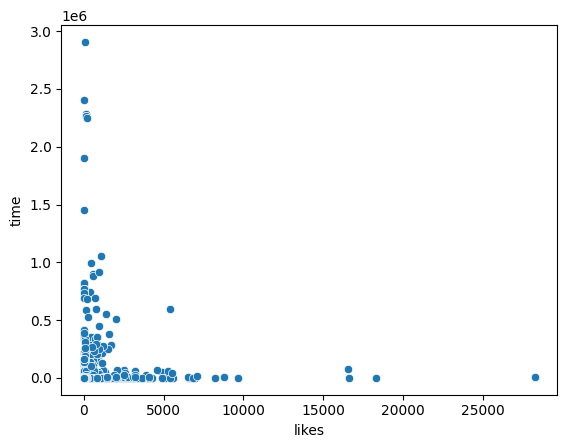

In [63]:
import seaborn as sns
sns.scatterplot(x=data['likes'], y=data['time'])

In [12]:
data = data[data['likes'] < 5000]
data = data[data['time'] <= data['time'].mean()]
data.shape

(5699, 3)

In [13]:
data['likes_per_day'] = ((1440 * data['likes']) / (data['time'])).astype(int)
data.describe()

,likes,time,likes_per_day
count,5699.000000,5699.000000,5699.000000
mean,70.331813,762.878575,435.064222
std,299.741172,1474.096341,2284.769850
min,1.000000,3.000000,0.000000
25%,3.000000,57.000000,24.000000
50%,9.000000,120.000000,84.000000
75%,24.000000,900.000000,261.000000
max,4905.000000,10080.000000,63576.000000


<AxesSubplot: xlabel='likes_per_day', ylabel='likes'>

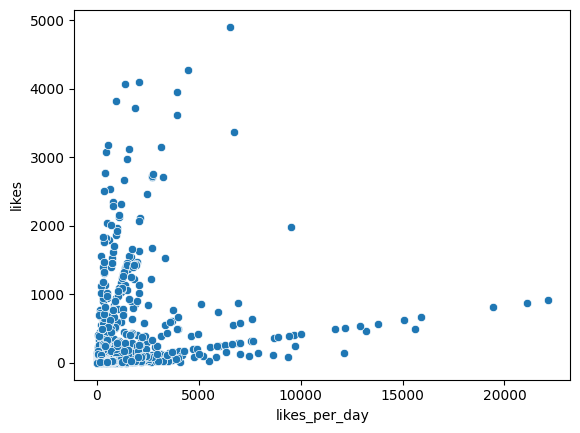

In [77]:
sns.scatterplot(x=data['likes_per_day'], y=data['likes'])

In [14]:
data = data[data['likes_per_day'] < 25000]
data.shape

(5683, 4)

In [15]:
data['popularity'] = (data['likes_per_day'] > data['likes_per_day'].quantile(q=0.75)).astype(int)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5683 entries, 0 to 9397
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           5683 non-null   object
 1   likes          5683 non-null   int64 
 2   time           5683 non-null   int64 
 3   likes_per_day  5683 non-null   int64 
 4   popularity     5683 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 266.4+ KB


In [133]:
data['popularity'].value_counts()

0    4263
1    1420
Name: popularity, dtype: int64

In [134]:
data = data.reset_index().drop(columns=['index'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683 entries, 0 to 5682
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           5683 non-null   object
 1   likes          5683 non-null   int64 
 2   time           5683 non-null   int64 
 3   likes_per_day  5683 non-null   int64 
 4   popularity     5683 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 222.1+ KB


In [25]:
new_data = pd.concat([tf_idf_frame, data['popularity']], axis=1)
new_data.head()

,або,абсолютно,абхазия,авто,автобус,автомат,автомоб,автомобиль,автор,авторский,...,являться,язык,яйцо,як,який,январь,яркий,яхта,ёлка,popularity
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot: xlabel='popularity'>

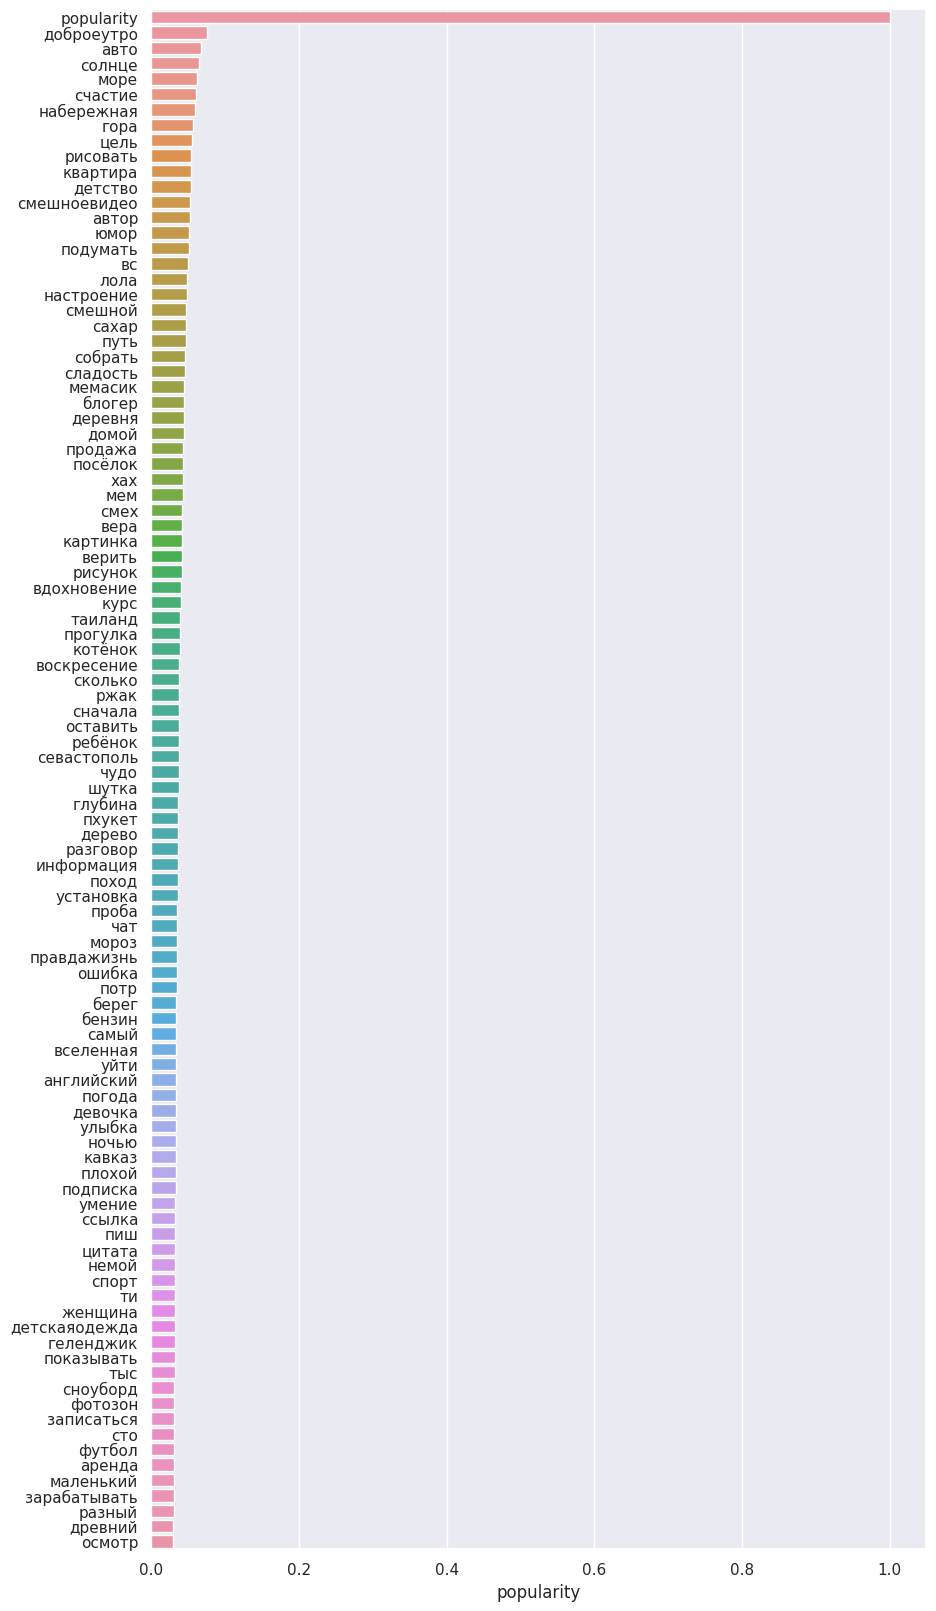

In [97]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 20)});

corr = pd.Series(new_data.corr()['popularity'], index=new_data.columns).sort_values(ascending=False)
sns.barplot(x=corr[:100], y=corr[:100].index)

In [211]:
corr = corr.sort_values()
max_corr = [corr.index[i] for i in range(len(corr)) if corr[i] > 0.03]
len(max_corr)

125

In [26]:
new_data.to_csv('../FotoCaptions/data/prepared_data.csv', index=False)

OSError: Cannot save file into a non-existent directory: '../FotoCaptions/data'

In [5]:
train_data = pd.read_csv('/home/ejenliya/Projects/FotoCaptions/data/prepared_data.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5683 entries, 0 to 5682
Columns: 1872 entries, або to popularity
dtypes: float64(1871), int64(1)
memory usage: 81.2 MB


In [6]:
train_target = train_data.pop('popularity')

In [7]:
from imblearn.over_sampling import ADASYN

train_data_rsmpld, target_rsmpld = ADASYN().fit_resample(train_data, train_target)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=200)
tree.fit(train_data_rsmpld, target_rsmpld)
preds = tree.predict(train_data_rsmpld)
print(accuracy_score(preds, target_rsmpld))

0.9771210676835081


<AxesSubplot: >

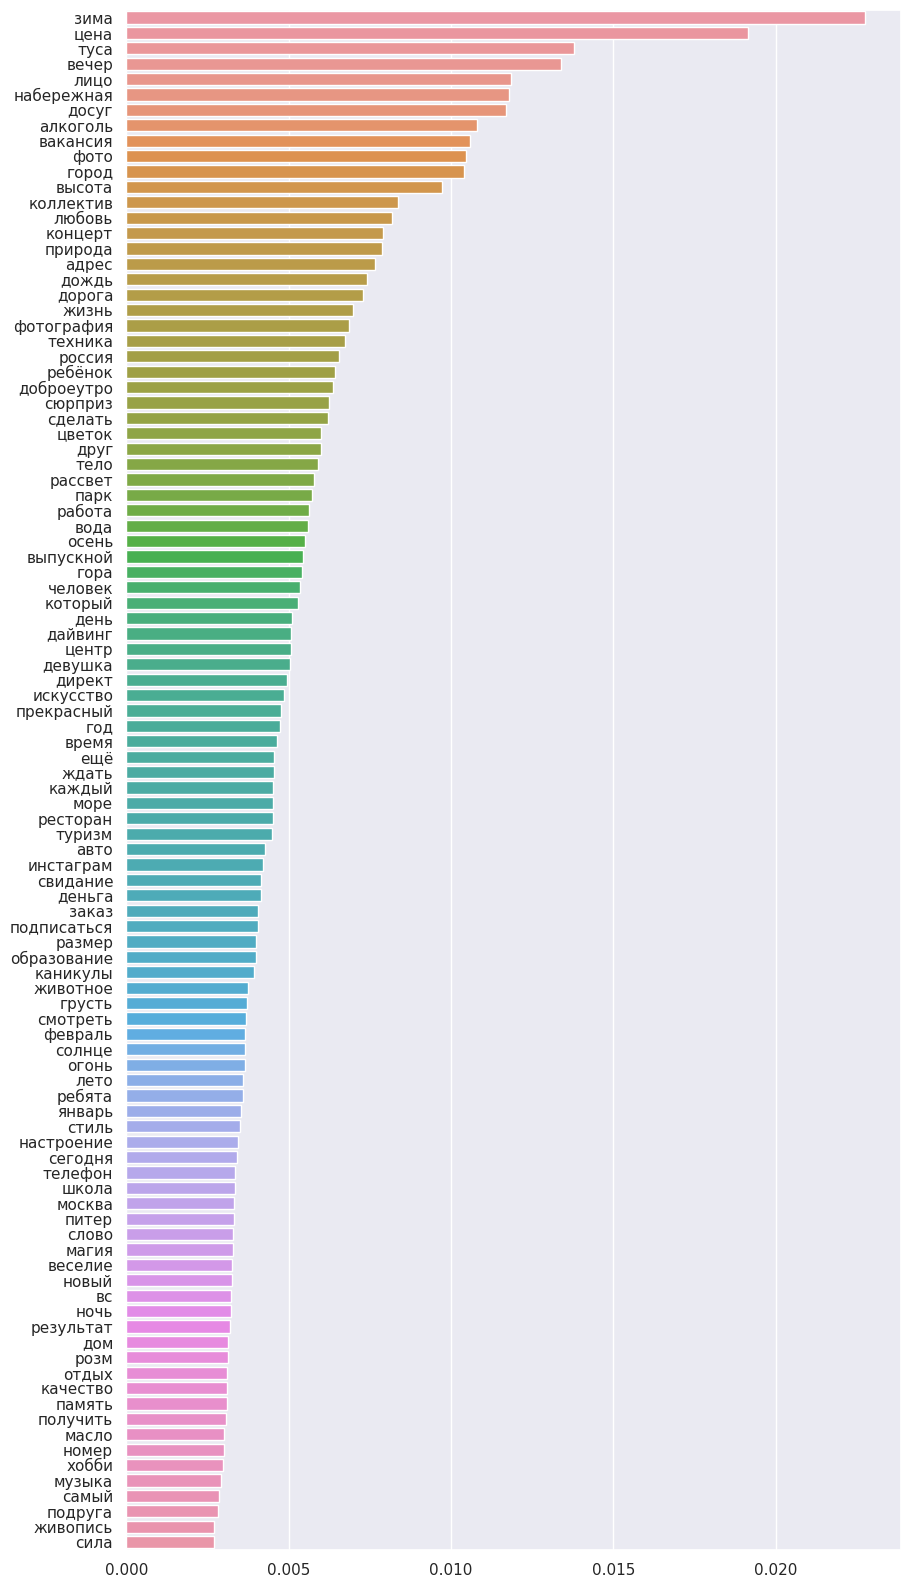

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 20)});

feature_importances = pd.Series(tree.feature_importances_, index=train_data.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[:100], y=feature_importances[:100].index)

In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_valid, y_train, y_valid = train_test_split(train_data_rsmpld, target_rsmpld, test_size=0.2, random_state=12)

In [41]:
from xgboost import XGBClassifier
import numpy as np

xgb = XGBClassifier()
params = {'n_estimators': np.arange(100, 401, 50),
         'max_depth': np.arange(2, 6)}

xgb_grid = GridSearchCV(xgb, params, cv=5, scoring='precision', n_jobs=-1)
xgb_grid.fit(X_train[feature_importances[:500].index], y_train)
xgb_grid.best_params_

{'max_depth': 5, 'n_estimators': 400}

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_xgb = xgb_grid.best_estimator_
preds = best_xgb.predict(X_valid[feature_importances[:500].index])
print('Accuracy: ', accuracy_score(y_valid, preds))
print('Precision: ', precision_score(y_valid, preds))
print('Recall: ', recall_score(y_valid, preds))
print('F1-score: ', f1_score(y_valid, preds))

Accuracy:  0.8088147706968434
Precision:  0.7953995157384988
Recall:  0.8121137206427689
F1-score:  0.8036697247706422


In [15]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier()
params = {'n_estimators': np.arange(100, 301, 50),
        'max_depth': np.arange(80, 201, 10)}

rf_grid = GridSearchCV(rf, params, cv=5, scoring='precision', n_jobs=-1)
rf_grid.fit(X_train[feature_importances[:700].index], y_train)
rf_grid.best_params_

{'max_depth': 190, 'n_estimators': 250}

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_rf = rf_grid.best_estimator_
preds = best_rf.predict(X_valid[feature_importances[:700].index])
print('Accuracy: ', accuracy_score(y_valid, preds))
print('Precision: ', precision_score(y_valid, preds))
print('Recall: ', recall_score(y_valid, preds))
print('F1-score: ', f1_score(y_valid, preds))

Accuracy:  0.863013698630137
Precision:  0.8475390156062425
Recall:  0.8726823238566132
F1-score:  0.8599269183922046


In [87]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

svc = SVC()
params = {'C': np.arange(0.5, 12.5, 0.5),
         'kernel': ['poly', 'rbf']}

svc_grid = GridSearchCV(svc, params, cv=5, scoring='precision', n_jobs=-1)
svc_grid.fit(X_train[feature_importances[:60].index], y_train)
svc_grid.best_params_

{'C': 10.5, 'kernel': 'rbf'}

In [88]:
best_svc = svc_grid.best_estimator_
preds = best_svc.predict(X_valid[feature_importances[:60].index])
print('Accuracy: ', accuracy_score(y_valid, preds))
print('Precision: ', precision_score(y_valid, preds))
print('Recall: ', recall_score(y_valid, preds))
print('F1-score: ', f1_score(y_valid, preds))

Accuracy:  0.6796769851951547
Precision:  0.6445012787723785
Recall:  0.717948717948718
F1-score:  0.6792452830188679
